<a href="https://colab.research.google.com/github/ShifaliSanthosh/Thyroid-Cancer-Prediction/blob/main/MiniProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.5 MB/s eta 0:00:00


# Load Dataset 1

In [ ]:
from google.colab import files
import pandas as pd
from IPython.display import display, HTML

# Upload files
uploaded = files.upload()

# Assuming you uploaded a CSV file, load it into a DataFrame
file_path = next(iter(uploaded))  # Get the file name
data = pd.read_csv(file_path)

# Display dataset details
display(HTML(data.head().to_html()))
print(data.info())  # Display concise summary of the dataset

Saving (1) thyroid_clean.csv to (1) thyroid_clean.csv


,id,Age,Gender,FT3,FT4,TSH,TPO,TGAb,Site,Echo_pattern,Multifocality,Size,Shape,Margins,Calcification,Echo Strength,Blood Flow,Composition,Multilateral,Result
0,1,46,1,4.34,12.41,1.677,0.43,0.98,0,0,0,4.6,0,0,0,4,0,1,1,1
1,2,61,1,5.40,16.26,2.905,0.45,1.91,0,0,0,4.2,0,1,1,4,1,2,1,1
2,3,44,1,3.93,13.39,1.823,9.15,26.25,0,0,0,0.7,0,1,0,4,0,2,1,0
3,5,29,0,3.70,13.98,1.293,0.15,0.81,0,0,1,1.0,1,1,1,4,0,2,1,1
4,6,37,1,3.60,14.56,0.938,0.13,21.22,0,0,0,0.7,0,1,1,4,0,2,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1232 non-null   int64  
 1   Age            1232 non-null   int64  
 2   Gender         1232 non-null   int64  
 3   FT3            1232 non-null   float64
 4   FT4            1232 non-null   float64
 5   TSH            1232 non-null   float64
 6   TPO            1232 non-null   float64
 7   TGAb           1232 non-null   float64
 8   Site           1232 non-null   int64  
 9   Echo_pattern   1232 non-null   int64  
 10  Multifocality  1232 non-null   int64  
 11  Size           1232 non-null   float64
 12  Shape          1232 non-null   int64  
 13  Margins        1232 non-null   int64  
 14  Calcification  1232 non-null   int64  
 15  Echo Strength  1232 non-null   int64  
 16  Blood Flow     1232 non-null   int64  
 17  Composition    1232 non-null   int64  
 18  Multilat

# Load Dataset 2


In [ ]:
from google.colab import files
import pandas as pd
from IPython.display import display, HTML

# Upload files
uploaded = files.upload()

# Assuming you uploaded a CSV file, load it into a DataFrame
file_path = next(iter(uploaded))  # Get the file name
data = pd.read_csv(file_path)

# Display dataset details
display(HTML(data.head().to_html()))
print(data.info())  # Display concise summary of the dataset

Saving (2) Thyroid_Diff.csv to (2) Thyroid_Diff.csv


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

# Load Dataset 3

In [ ]:
from google.colab import files
import pandas as pd
from IPython.display import display, HTML

# Upload files
uploaded = files.upload()

# Assuming you uploaded a CSV file, load it into a DataFrame
file_path = next(iter(uploaded))  # Get the file name
data = pd.read_csv(file_path)

# Display dataset details
display(HTML(data.head().to_html()))
print(data.info())  # Display concise summary of the dataset

Saving (3) noduleData.csv to (3) noduleData.csv


,CaseID,Label,Age,Sex,Comp,Echo,Margins,Calc,TIRADS
0,2,B,49,F,solid,hyper,well,none,2
1,3,B,31,F,spong,iso,well,micro,4a
2,4,M,37,F,spong,iso,well,micro,4a
3,5,B,47,F,solid,hypo,ill,micro,5
4,6,M,60,F,spong,iso,ill,micro,4b


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CaseID   177 non-null    int64 
 1   Label    177 non-null    object
 2   Age      177 non-null    int64 
 3   Sex      177 non-null    object
 4   Comp     177 non-null    object
 5   Echo     177 non-null    object
 6   Margins  177 non-null    object
 7   Calc     177 non-null    object
 8   TIRADS   177 non-null    object
dtypes: int64(2), object(7)
memory usage: 12.6+ KB
None


# XML TO CSV

In [ ]:
import os
import csv
import xml.etree.ElementTree as ET

def parse_xml_to_csv(folder_path, output_csv):

    data_rows = []


    headers = [
        'number', 'age', 'sex', 'composition', 'echogenicity', 'margins',
        'calcifications', 'tirads', 'reportbacaf', 'reporteco', 'image', 'svg'
    ]
    data_rows.append(headers)

    for filename in os.listdir(folder_path):
        if filename.endswith(".xml"):
            file_path = os.path.join(folder_path, filename)
            tree = ET.parse(file_path)
            root = tree.getroot()

            case_number = root.findtext('number')
            age = root.findtext('age')
            sex = root.findtext('sex')
            composition = root.findtext('composition')
            echogenicity = root.findtext('echogenicity')
            margins = root.findtext('margins')
            calcifications = root.findtext('calcifications')
            tirads = root.findtext('tirads')
            reportbacaf = root.findtext('reportbacaf')
            reporteco = root.findtext('reporteco')


            marks = root.findall('mark')
            for mark in marks:
                image = mark.findtext('image')
                svg = mark.findtext('svg')
                row = [
                    case_number, age, sex, composition, echogenicity, margins,
                    calcifications, tirads, reportbacaf, reporteco, image, svg
                ]
                data_rows.append(row)
    data_rows[1:] = sorted(data_rows[1:], key=lambda x: int(x[0]) if x[0].isdigit() else float('inf'))


    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerows(data_rows)

    print(f"Data has been successfully written to {output_csv}")

folder_path = 'DDTI'
output_csv = 'DDTI.csv'


parse_xml_to_csv(folder_path, output_csv)

## Mapping of values

In [ ]:
import csv

def transform_data(input_csv, output_csv):

    gender_map = {'F
    with open(input_csv, 'r', newline='', encoding='utf-8') as infile, open(output_csv, 'w', newline='', encoding='utf-8') as outfile:
        reader = csv.DictReader(infile)
        fieldnames = ['age', 'sex', 'composition', 'echogenicity', 'margins', 'calcifications', 'tirads']
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        writer.writeheader()

        for row in reader:
            transformed_row = {
                'age': row['age'],
                'sex': gender_map.get(row['sex'], row['sex']),
                'composition': composition_map.get(row['composition'], row['composition']),
                'echogenicity': echogenicity_map.get(row['echogenicity'], row['echogenicity']),
                'margins': margins_map.get(row['margins'], row['margins']),
                'calcifications': calcifications_map.get(row['calcifications'], row['calcifications']),
                'tirads': tirads_map.get(row['tirads'], row['tirads'])
            }
            writer.writerow(transformed_row)

    print(f"Transformed data has been successfully written to {output_csv}")

input_csv = "DDTI.csv"
output_csv = 'mapped_DDTI_draft.csv'


transform_data(input_csv, output_csv)


Transformed data has been successfully written to mapped_DDTI_draft.csv


# Load Dataset 4

In [ ]:
from google.colab import files
import pandas as pd
from IPython.display import display, HTML

# Upload files
uploaded = files.upload()
# Assuming you uploaded a CSV file, load it into a DataFrame
file_path = next(iter(uploaded))  # Get the file name
data = pd.read_csv(file_path)

# Display dataset details
display(HTML(data.head().to_html()))
print(data.info())  # Display concise summary of the dataset

Saving mapped_DDTI_draft (2).csv to mapped_DDTI_draft (2).csv


,age,sex,composition,echogenicity,margins,calcifications,shape,multifocality,TSH,tirads(result)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,49.0,0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,0.0
3,31.0,0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0
4,37.0,0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             356 non-null    float64
 1   sex             357 non-null    object 
 2   composition     216 non-null    float64
 3   echogenicity    216 non-null    float64
 4   margins         347 non-null    float64
 5   calcifications  350 non-null    float64
 6   shape           0 non-null      float64
 7   multifocality   0 non-null      float64
 8   TSH             0 non-null      float64
 9   tirads(result)  349 non-null    float64
dtypes: float64(9), object(1)
memory usage: 37.6+ KB
None


## Merging CSV files

In [ ]:
from google.colab import files
import pandas as pd
from IPython.display import display, HTML

# Upload files
uploaded = files.upload()

# Initialize an empty list to store the dataframes
dfs = []

# Iterate over the uploaded files and load them appropriately
for file_name in uploaded.keys():
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_name)
    elif file_name.endswith('.xlsx'):
        df = pd.read_excel(file_name)
    else:
        raise ValueError("Unsupported file format: " + file_name)

    # Append to the list of dataframes
    dfs.append(df)

# Get the union of all columns from all datasets
common_columns = set()
for df in dfs:
    common_columns.update(df.columns)

# Ensure all dataframes have the same columns
for df in dfs:
    for col in common_columns:
        if col not in df.columns:
            df[col] = pd.NA

# Concatenate dataframes
combined_df = pd.concat(dfs, ignore_index=True)

# Handle missing values if necessary
combined_df.fillna(method='ffill', inplace=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv('csv_final.csv', index=False)

# Display dataset details
display(HTML(combined_df.head().to_html()))  # Display head of the combined dataframe

print("\nDataset Info:")
print(combined_df.info())  # Display concise summary of the combined dataframe

# Download the combined dataframe
files.download('csv_final.csv')




Saving (1) thyroid_clean.csv to (1) thyroid_clean (1).csv
Saving (4) feature_xml.csv to (4) feature_xml (1).csv
Saving (2) Thyroid_Diff.csv to (2) Thyroid_Diff (1).csv
Saving (3) noduleData.csv to (3) noduleData (1).csv


,id,Age,Gender,FT3,FT4,TSH,TPO,TGAb,Site,Echo_pattern,Multifocality,Size,Shape,Margins,Calcification,Echo Strength,Blood Flow,Composition,Multilateral,Result,Sex,Response,Echo,TIRADS,Hx Radiothreapy,CaseID,Risk,Recurred,Comp,N,Calc,Physical Examination,Stage,Calcifications,Smoking,Hx Smoking,Adenopathy,Pathology,Label,M,Thyroid Function,Focality,T
0,1,46.0,1,4.34,12.41,1.677,0.43,0.98,0,0,0,4.6,0,0,0,4.0,0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,61.0,1,5.40,16.26,2.905,0.45,1.91,0,0,0,4.2,0,1,1,4.0,1,2.0,1,1,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,44.0,1,3.93,13.39,1.823,9.15,26.25,0,0,0,0.7,0,1,0,4.0,0,2.0,1,0,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,29.0,0,3.70,13.98,1.293,0.15,0.81,0,0,1,1.0,1,1,1,4.0,0,2.0,1,1,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,37.0,1,3.60,14.56,0.938,0.13,21.22,0,0,0,0.7,0,1,1,4.0,0,2.0,1,1,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2272 non-null   int64  
 1   Age                   2272 non-null   float64
 2   Gender                2272 non-null   object 
 3   FT3                   2272 non-null   float64
 4   FT4                   2272 non-null   float64
 5   TSH                   2272 non-null   float64
 6   TPO                   2272 non-null   float64
 7   TGAb                  2272 non-null   float64
 8   Site                  2272 non-null   int64  
 9   Echo_pattern          2272 non-null   int64  
 10  Multifocality         2272 non-null   int64  
 11  Size                  2272 non-null   float64
 12  Shape                 2272 non-null   int64  
 13  Margins               2272 non-null   object 
 14  Calcification         2272 non-null   int64  
 15  Echo S

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Imputing missing values

In [ ]:
#Imputing values using Linear regression or Random Forest based on best outcome

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer  # Import needed for IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from io import StringIO
from IPython.display import HTML

# Load the dataset
dataset = pd.read_csv('csv_final.csv')

# Delete records where 'Result' is empty
dataset = dataset.dropna(subset=['Result'])

# Separate features (X) and target variable (y)
X = dataset.drop('Result', axis=1)  # Features
y = dataset['Result']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define transformers for numerical and categorical columns
numeric_transformer = IterativeImputer(random_state=42)
categorical_transformer = IterativeImputer(random_state=42)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Try different models to find the best one
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

best_mse = float('inf')
best_model_name = None
best_pipeline = None

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error ({model_name}):", mse)

    if mse < best_mse:
        best_mse = mse
        best_model_name = model_name
        best_pipeline = pipeline

print(f"Best Model: {best_model_name} with MSE: {best_mse}")

# Use the best pipeline for filling missing values in the entire dataset
filled_X = pd.DataFrame(best_pipeline.named_steps['preprocessor'].transform(X), columns=X.columns)

# Ensure columns that were originally integers retain their whole number values
integer_columns = X.select_dtypes(include=['int64']).columns

# Round and convert integer columns back to integers
for col in integer_columns:
    filled_X[col] = filled_X[col].round().astype('int64')

# Ensure the other numerical features retain their original dtype
for col in numeric_features:
    if col not in integer_columns:
        filled_X[col] = filled_X[col].astype(X[col].dtype)

# Concatenate filled features with target variable
filled_dataset = pd.concat([filled_X, y.reset_index(drop=True)], axis=1)

# Save the filled dataset as a string buffer
csv_buffer = StringIO()
filled_dataset.to_csv(csv_buffer, index=False)

# Offer the filled dataset as a downloadable file
csv_string = csv_buffer.getvalue()

def create_download_link(csv_string, title="Download CSV file", filename="filled_dataset.csv"):
    html = f'<a href="data:text/csv;charset=utf-8,{csv_string}" download="{filename}">{title}</a>'
    return HTML(html)

# Create a download link for the filled dataset
display(create_download_link(csv_string))


Mean Squared Error (Linear Regression): 0.14547146996441085
Mean Squared Error (Random Forest): 0.12557891072023217
Best Model: Random Forest with MSE: 0.12557891072023217


## p-values

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from google.colab import files

uploaded = files.upload()

# Load the dataset
file_path = next(iter(uploaded))  # Get the file name
data = pd.read_csv(file_path)

# Define the target variable and the features
X = data.drop(columns='Result')
y = data['Result']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
logit_model = sm.Logit(y_train, X_train).fit()

# Summary of the model
model_summary = logit_model.summary()

print("Model Summary:\n", model_summary)

p_values = logit_model.pvalues
print("P-values:\n", p_values)

significant_features = p_values[p_values < 0.05].index.tolist()
non_significant_features = p_values[p_values >= 0.05].index.tolist()

# Remove the constant from the feature lists
if 'const' in significant_features:
    significant_features.remove('const')
if 'const' in non_significant_features:
    non_significant_features.remove('const')

print("Significant Features:", significant_features)
print("Non-Significant Features:", non_significant_features)

# Prepare the dataset with only significant features
X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]

# Add a constant to the model (for the intercept)
X_train_significant = sm.add_constant(X_train_significant)
X_test_significant = sm.add_constant(X_test_significant)

logit_model_significant = sm.Logit(y_train, X_train_significant).fit()

# Summary of the model including AIC and BIC
model_summary_significant = logit_model_significant.summary()

print("Significant Model Summary:\n", model_summary_significant)

# Save the dataset with only significant features
significant_features_with_target = significant_features + ['Result']
data_significant = data[significant_features_with_target]

# Save to CSV
output_path = 'done_dataset_significant_features.csv'
data_significant.to_csv(output_path, index=False)
print(f"Significant features dataset saved to: {output_path}")

Saving done_dataset.csv to done_dataset (1).csv
Optimization terminated successfully.
         Current function value: 0.419194
         Iterations 7
Model Summary:
                            Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                 1712
Model:                          Logit   Df Residuals:                     1695
Method:                           MLE   Df Model:                           16
Date:                Thu, 18 Jul 2024   Pseudo R-squ.:                  0.2422
Time:                        06:23:32   Log-Likelihood:                -717.66
converged:                       True   LL-Null:                       -947.03
Covariance Type:            nonrobust   LLR p-value:                 1.662e-87
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3060      0.949   

## EDA

    Age  Composition  Margin  Calcification  Shape  Multifocality  FT3  size  \
0  46.0          1.0     0.0            0.0    0.0            0.0  4.0   5.0   
1  61.0          2.0     1.0            1.0    0.0            0.0  5.0   4.0   
2  44.0          2.0     1.0            0.0    0.0            0.0  4.0   1.0   
3  29.0          2.0     1.0            1.0    1.0            1.0  4.0   1.0   
4  37.0          2.0     1.0            1.0    0.0            0.0  4.0   1.0   

   blood_flow  multilateral  Result  
0         0.0           1.0       1  
1         1.0           1.0       1  
2         0.0           1.0       0  
3         0.0           1.0       1  
4         0.0           1.0       1  


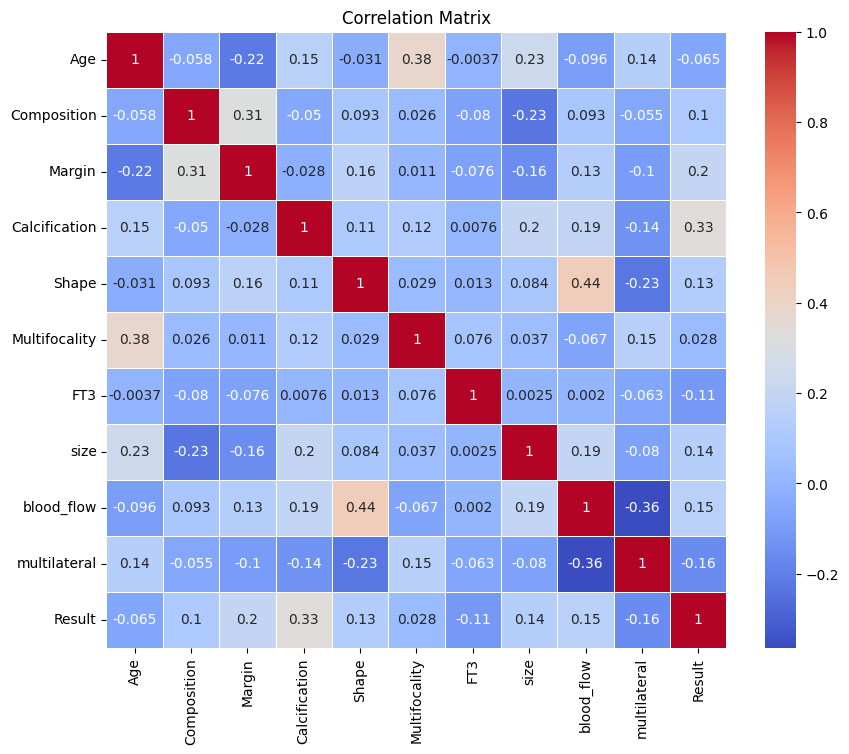

['Age', 'Composition', 'Margin', 'Calcification', 'Shape', 'Multifocality', 'FT3', 'size', 'blood_flow', 'multilateral', 'Result']


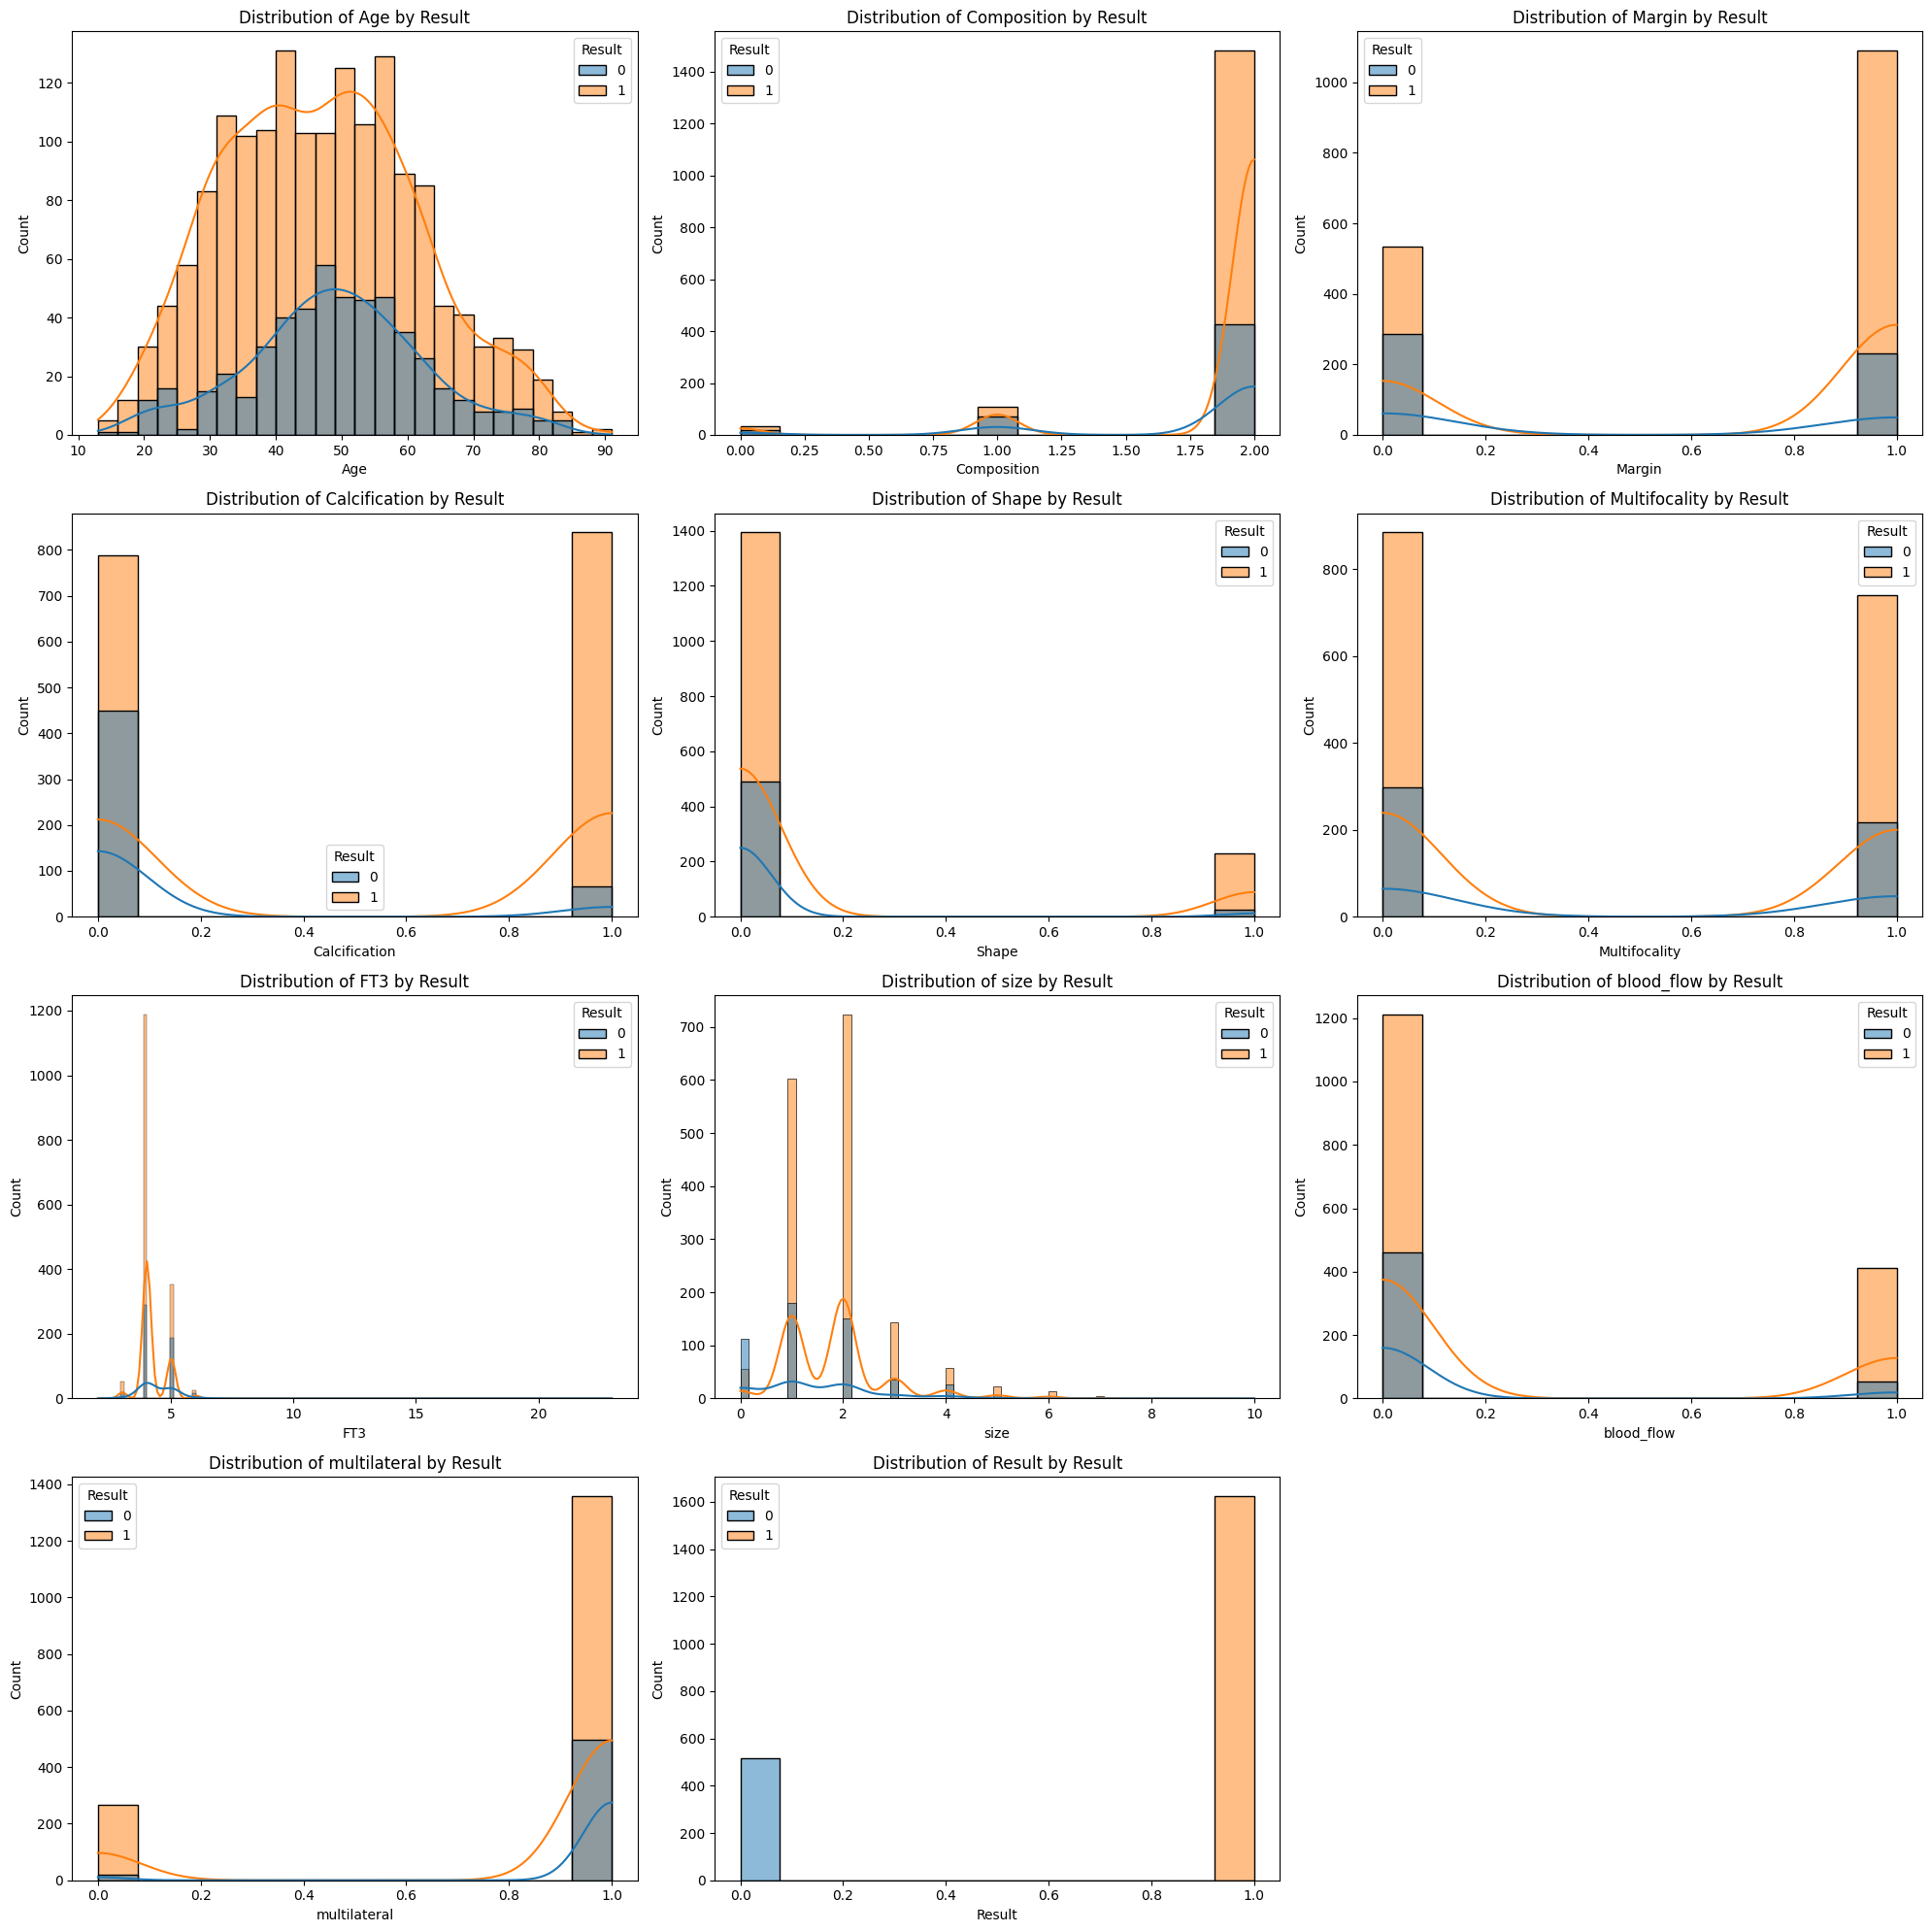

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("done_dataset_significant_features.csv")

print(data.head())
data.describe()

corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()
categorical_features=[]
for column in data.columns:
    categorical_features.append(column)

print(categorical_features)

# Plot each feature's distribution on the diagonal
for i, feature in enumerate(categorical_features):
    sns.histplot(data=data, x=feature, hue='Result', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Result')

# Remove any unused subplots
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



## Scatter Plots

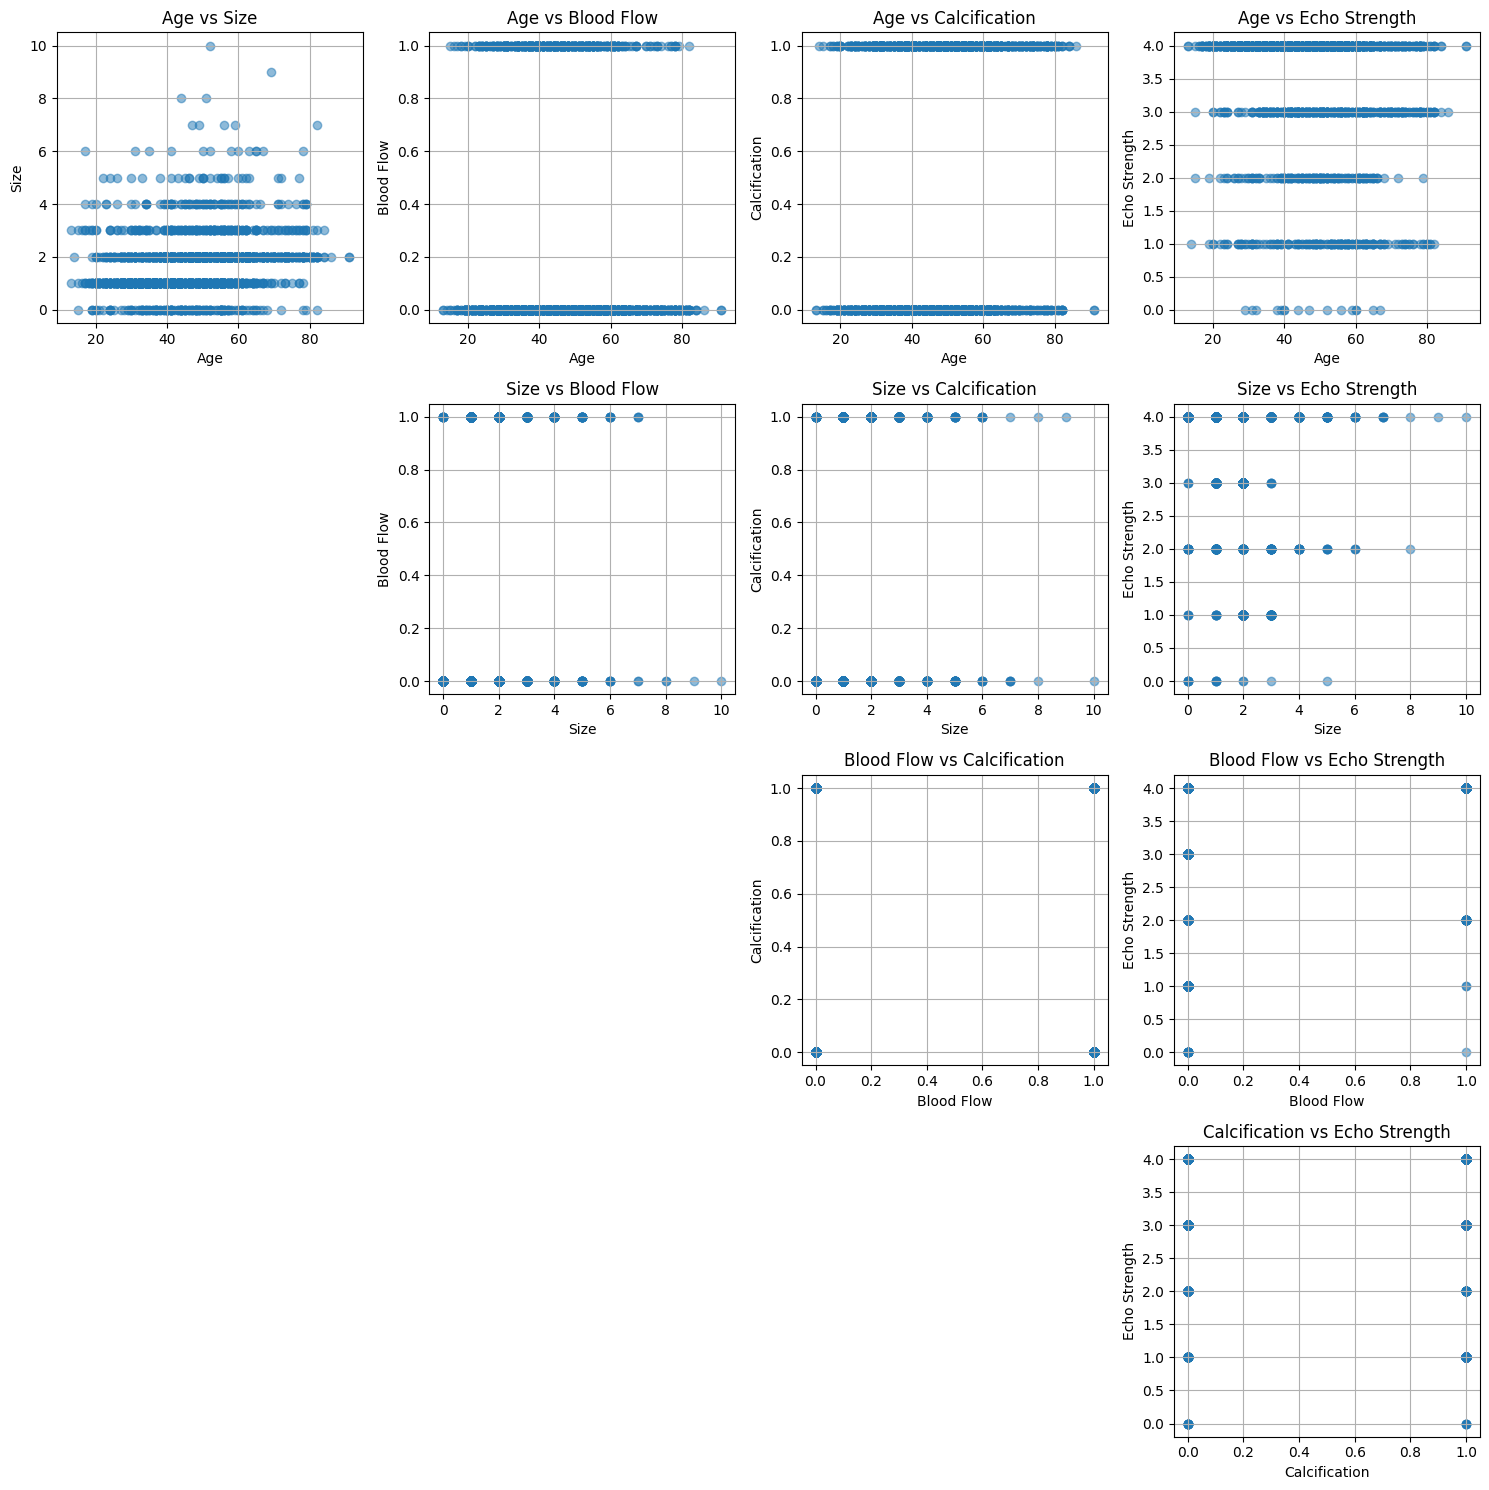

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('done_dataset_significant_features.csv')

# Define the selected features for scatter plots
selected_features = ['Age', 'Size', 'Blood Flow', 'Calcification', 'Echo Strength']

# Create scatter plots for all pairs of selected features
num_features = len(selected_features)
plt.figure(figsize=(15, 15))  # Adjust size as needed

for i in range(num_features):
    for j in range(i + 1, num_features):
        plt.subplot(num_features - 1, num_features - 1, i * (num_features - 1) + j)
        x_feature = selected_features[i]
        y_feature = selected_features[j]

        # Scatter plot
        plt.scatter(df[x_feature], df[y_feature], alpha=0.5)
        plt.title(f'{x_feature} vs {y_feature}')
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
        plt.grid(True)

# Adjust layout and show plots
plt.tight_layout()
plt.show()



## GBM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

uploaded = files.upload()

# Load the dataset
file_path = next(iter(uploaded))  # Get the file name
data = pd.read_csv(file_path)

X = data.drop(columns=['Result'])
y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Saving done_dataset_significant_features.csv to done_dataset_significant_features (1).csv
Accuracy: 0.8112


## LDA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

uploaded = files.upload()

# Load the dataset
file_path = next(iter(uploaded))  # Get the file name
data = pd.read_csv(file_path)

X = data.drop(columns=['Result'])
y = data['Result']


lda_model = LinearDiscriminantAnalysis()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


lda_model.fit(X_train, y_train)


y_pred = lda_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")



Saving done_dataset_significant_features.csv to done_dataset_significant_features (2).csv
Accuracy: 0.7879


## Linear SVM

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

uploaded = files.upload()

# Load the dataset
file_path = next(iter(uploaded))  # Get the file name
data = pd.read_csv(file_path)

X = data.drop(columns=['Result'])
y = data['Result']

svm_model = SVC(kernel='linear', probability=True, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")



Saving done_dataset_significant_features.csv to done_dataset_significant_features (3).csv
Accuracy: 0.7972


## Radial SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files  # This import is specific to Google Colab

# Upload the dataset
uploaded = files.upload()

# Load the dataset
file_path = next(iter(uploaded))  # Get the file name
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop(columns=['Result'])
y = data['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Saving done_dataset_significant_features.csv to done_dataset_significant_features (1).csv
Accuracy: 0.7622


## LR

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files  # This import is specific to Google Colab

# Upload the dataset
uploaded = files.upload()

# Load the dataset
file_path = next(iter(uploaded))  # Get the file name
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop(columns=['Result'])
y = data['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Saving done_dataset_significant_features.csv to done_dataset_significant_features.csv
Accuracy: 0.8089


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# FNN

Saving done_dataset_significant_features (2).csv to done_dataset_significant_features (2) (6).csv
Epoch 1/50
43/43 [==============================] - 1s 6ms/step - loss: 0.5751 - accuracy: 0.7129 - val_loss: 0.5179 - val_accuracy: 0.7580
Epoch 2/50
43/43 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.7933 - val_loss: 0.4402 - val_accuracy: 0.8047
Epoch 3/50
43/43 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8188 - val_loss: 0.4078 - val_accuracy: 0.8134
Epoch 4/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8225 - val_loss: 0.3919 - val_accuracy: 0.8222
Epoch 5/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8218 - val_loss: 0.3901 - val_accuracy: 0.8280
Epoch 6/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3699 - accuracy: 0.8283 - val_loss: 0.3821 - val_accuracy: 0.8280
Epoch 7/50
43/43 [==============================] - 0s 3ms/ste

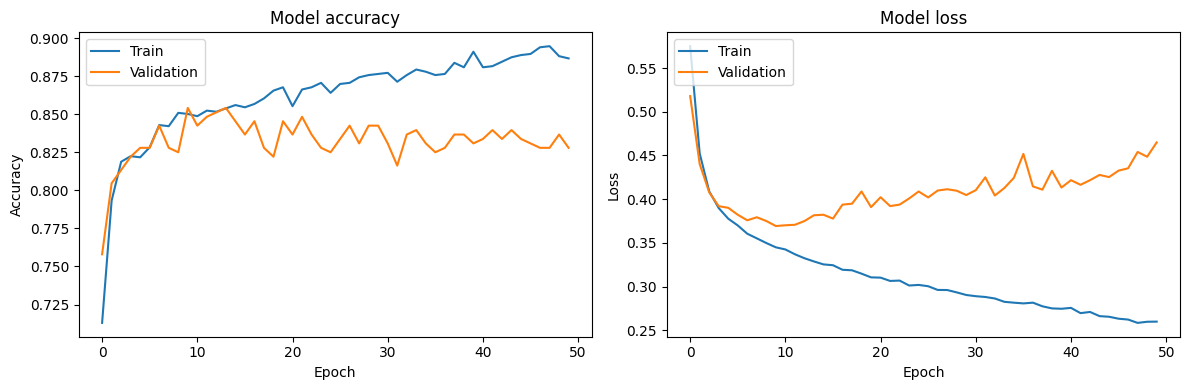

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

uploaded = files.upload()
file_path = list(uploaded.keys())[0]

data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('Result', axis=1)
y = data['Result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the FNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test).round()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# MLP

Saving done_dataset_significant_features (2).csv to done_dataset_significant_features (2) (7).csv
Epoch 1/50
43/43 [==============================] - 1s 6ms/step - loss: 0.5080 - accuracy: 0.7772 - val_loss: 0.4551 - val_accuracy: 0.7872
Epoch 2/50
43/43 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8167 - val_loss: 0.4004 - val_accuracy: 0.8222
Epoch 3/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.8240 - val_loss: 0.3853 - val_accuracy: 0.8280
Epoch 4/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8356 - val_loss: 0.3797 - val_accuracy: 0.8280
Epoch 5/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8459 - val_loss: 0.3694 - val_accuracy: 0.8397
Epoch 6/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3474 - accuracy: 0.8451 - val_loss: 0.3709 - val_accuracy: 0.8455
Epoch 7/50
43/43 [==============================] - 0s 3ms/ste

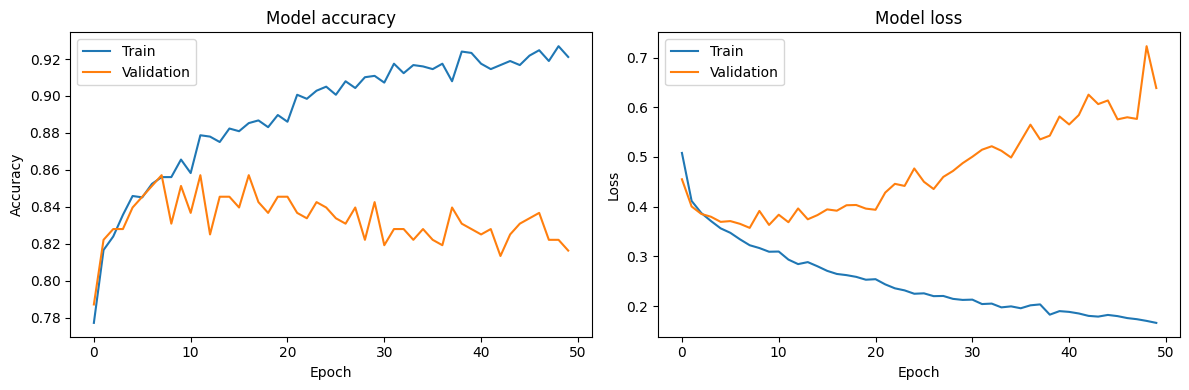

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

uploaded = files.upload()

# Get the uploaded file name
file_path = list(uploaded.keys())[0]

# Load the dataset
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('Result', axis=1)
y = data['Result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test).round()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# RNN

Saving done_dataset_significant_features (2).csv to done_dataset_significant_features (2) (8).csv
Epoch 1/50
43/43 [==============================] - 1s 9ms/step - loss: 0.5356 - accuracy: 0.7473 - val_loss: 0.5090 - val_accuracy: 0.7609
Epoch 2/50
43/43 [==============================] - 0s 3ms/step - loss: 0.4530 - accuracy: 0.7904 - val_loss: 0.4471 - val_accuracy: 0.7843
Epoch 3/50
43/43 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8291 - val_loss: 0.4172 - val_accuracy: 0.8105
Epoch 4/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3901 - accuracy: 0.8305 - val_loss: 0.4025 - val_accuracy: 0.8192
Epoch 5/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3791 - accuracy: 0.8320 - val_loss: 0.3969 - val_accuracy: 0.8222
Epoch 6/50
43/43 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8451 - val_loss: 0.3937 - val_accuracy: 0.8280
Epoch 7/50
43/43 [==============================] - 0s 3ms/ste

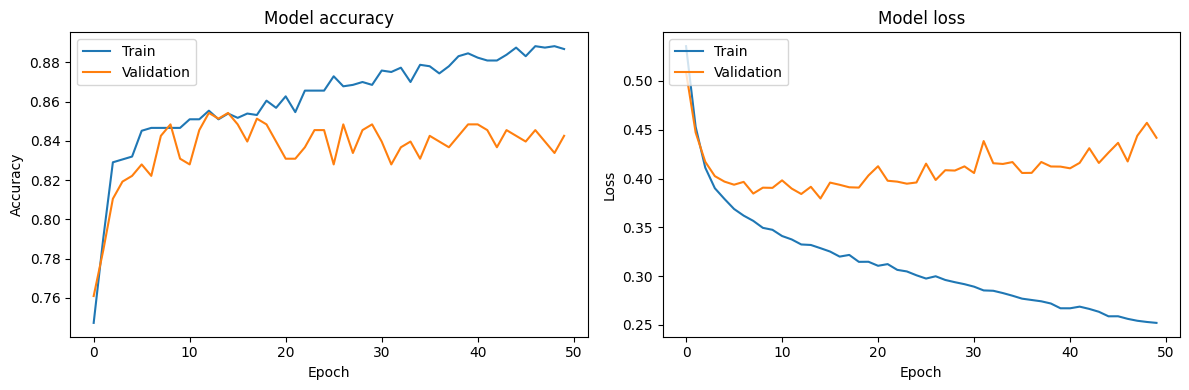

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

uploaded = files.upload()

# Get the uploaded file name
file_path = list(uploaded.keys())[0]

# Load the dataset
data = pd.read_csv(file_path)

X = data.drop('Result', axis=1)
y = data['Result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data to fit into RNN (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the RNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test).round()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Random Forest

Saving done_dataset_significant_features.csv to done_dataset_significant_features (4).csv
Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
609 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Leave-One-Out Cross Validation Accuracy: 0.8929
Stratified K-Fold Cross Validation Accuracy: 0.8065
Confusion Matrix:
[[ 55  47]
 [ 36 291]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.54      0.57       102
           1       0.86      0.89      0.88       327

    accuracy                           0.81       429
   macro avg       0.73      0.71      0.72       429
weighted avg       0.80      0.81      0.80       429



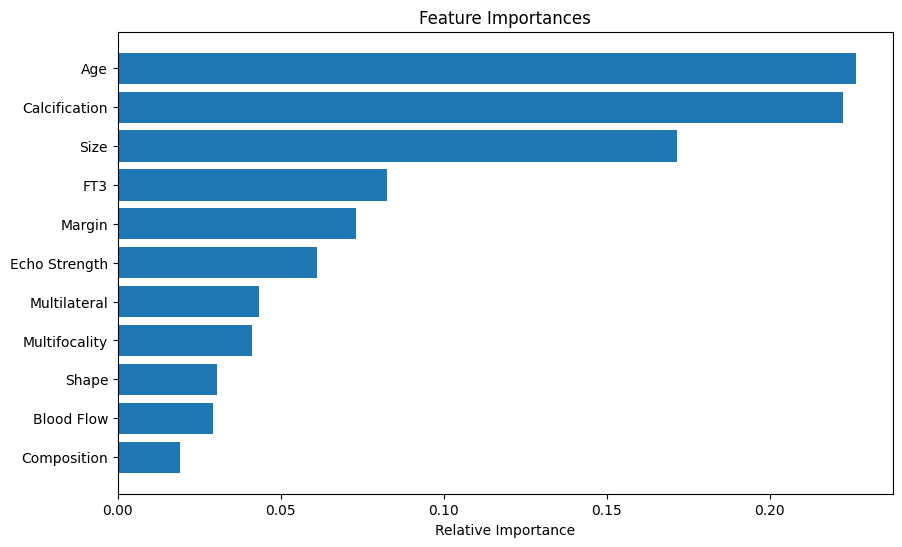

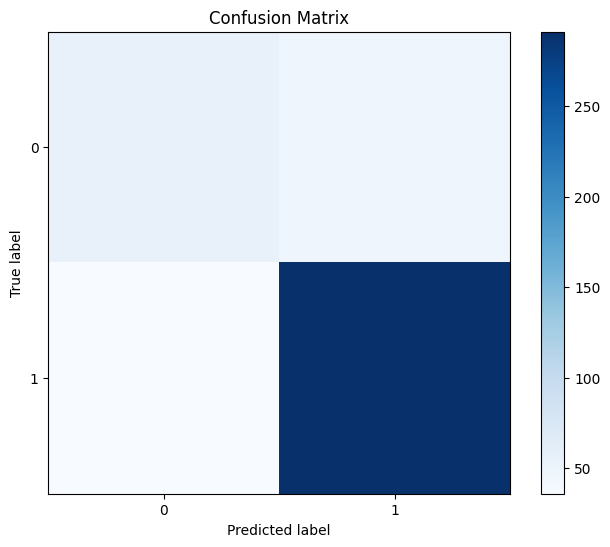

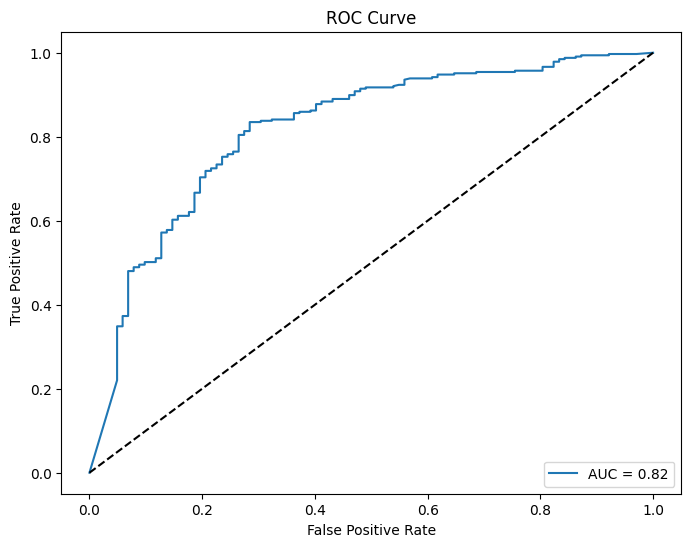

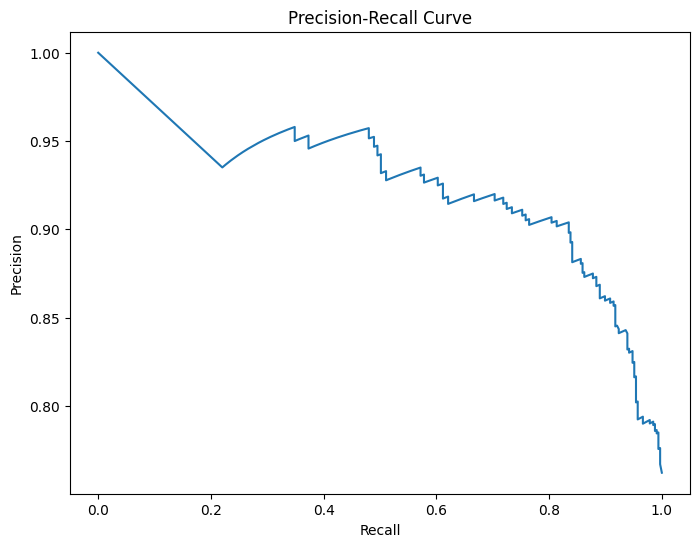

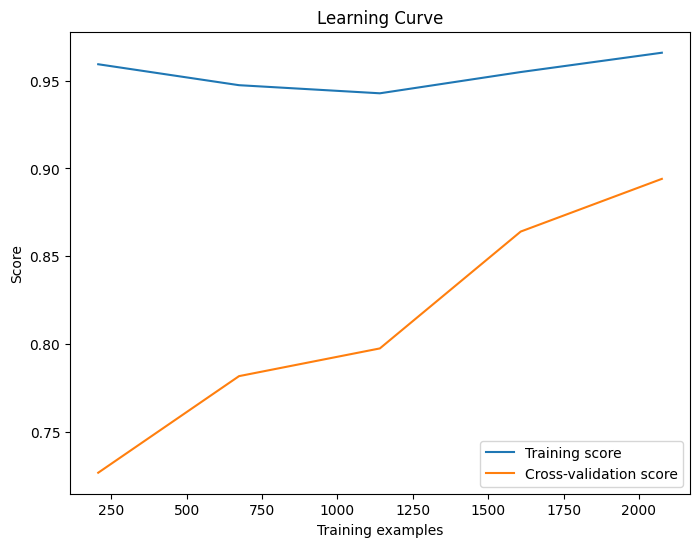

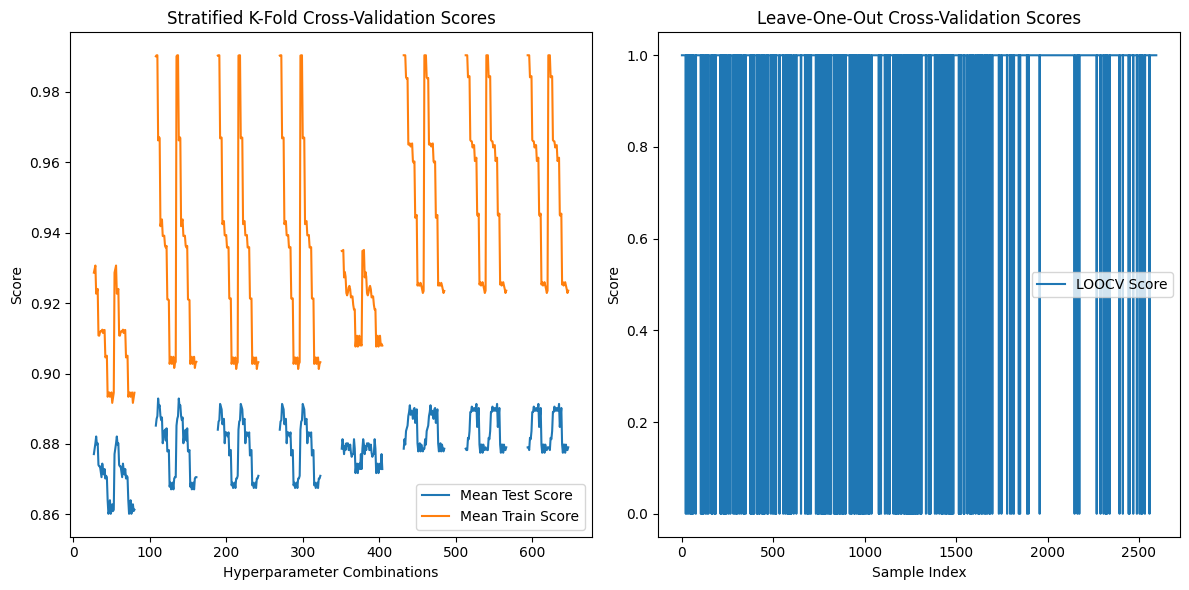

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, LeaveOneOut, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from google.colab import files
import xgboost as xgb

# Upload the dataset
uploaded = files.upload()

# Load the dataset
file_path = next(iter(uploaded))  # Get the file name
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('Result', axis=1)
y = data['Result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle imbalanced data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2,
                           return_train_score=True)
grid_search.fit(X_train_res, y_train_res)
best_rf_skf = grid_search.best_estimator_

# Leave-One-Out Cross Validation
loo = LeaveOneOut()
rf_loocv = RandomForestClassifier(random_state=42, **grid_search.best_params_)
loocv_scores = cross_val_score(rf_loocv, X_train_res, y_train_res, cv=loo, n_jobs=-1)

# Print LOOCV results
print(f'Leave-One-Out Cross Validation Accuracy: {np.mean(loocv_scores):.4f}')

# Evaluate the best model from Stratified K-Fold Cross Validation
y_pred_skf = best_rf_skf.predict(X_test)
accuracy_skf = accuracy_score(y_test, y_pred_skf)
conf_matrix_skf = confusion_matrix(y_test, y_pred_skf)
class_report_skf = classification_report(y_test, y_pred_skf)

# Display results for Stratified K-Fold Cross Validation
print(f'Stratified K-Fold Cross Validation Accuracy: {accuracy_skf:.4f}')
print("Confusion Matrix:")
print(conf_matrix_skf)
print("Classification Report:")
print(class_report_skf)

# Display feature importances from the best model
feature_importances = best_rf_skf.feature_importances_
features = data.columns[:-1]  # Exclude the target column
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.imshow(conf_matrix_skf, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, set(y))
plt.yticks(tick_marks, set(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve
y_prob_skf = best_rf_skf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_skf)
roc_auc = roc_auc_score(y_test, y_prob_skf)

plt.figure(figsize=(8, 6))
plt.title("ROC Curve")
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_skf)

plt.figure(figsize=(8, 6))
plt.title("Precision-Recall Curve")
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_rf_skf, X_train_res, y_train_res, cv=skf, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Learning Curve")
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Cross-Validation Scores
cv_results = grid_search.cv_results_

plt.figure(figsize=(12, 6))

# Plot for Stratified K-Fold Cross Validation
plt.subplot(1, 2, 1)
plt.title("Stratified K-Fold Cross-Validation Scores")
plt.plot(cv_results['mean_test_score'], label='Mean Test Score')
plt.plot(cv_results['mean_train_score'], label='Mean Train Score')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Score')
plt.legend()

# Plot for Leave-One-Out Cross Validation
plt.subplot(1, 2, 2)
plt.title("Leave-One-Out Cross-Validation Scores")
plt.plot(np.arange(len(loocv_scores)), loocv_scores, label='LOOCV Score')
plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()



Algorithms (Base Paper)
*   GBM: 0.7741
*   Logistic Regression: 0.7834
*   LDA: 0.7790
*   SVM (radial): 0.7688
*   SVM (linear): 0.7661
*   Random Forest: 0.7931

Algorithms (Implemented)
*   GBM: 0.8112
*   Logistic Regression: 0.8089
*   LDA: 0.7879
*   SVM (radial): 0.7622
*   SVM (linear): 0.7972
*   Random Forest:
    
    Leave-One-Out Cross Validation Accuracy: 0.8929
    
    
    Stratified K-Fold Cross Validation Accuracy: 0.8065



